SDV - Multi Table - HMA1 
==========

## HMA1 analyzes relational data by modeling relationships between tables


In [ ]:
from sdv.demo import sample_relational_demo

metadata, tables = sample_relational_demo(size=30)

In [6]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

*Visualization requires graphviz.*

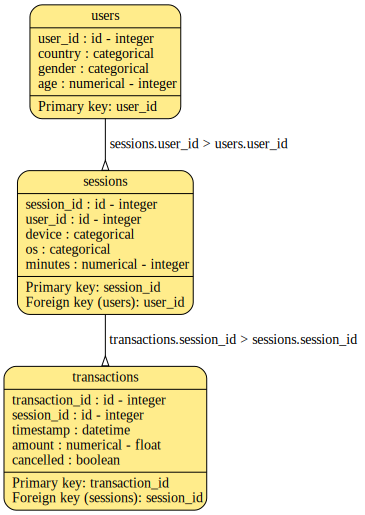

In [7]:
metadata.visualize()

`tables` is a dict containing three `pandas.DataFrames`.

In [17]:
from sdv.utils import display_tables

display_tables(tables)

In [9]:
for name, table in tables.items():
    print(name, table.shape)

users (30, 4)
sessions (66, 5)
transactions (371, 5)


### Train `HMA1` on the sample data
Note that `metadata` is now provided to `HMA1`.

In [20]:
%%capture --no-stdout
from sdv.relational import HMA1

model = HMA1(metadata)
model.fit(tables)

### Generate synthetic data from the model

In [15]:
%%capture --no-stdout
new_data = model.sample()

This will return a dictionary of tables identical to the one which the
model was fitted on, but filled with new data which resembles the
original one.

In [16]:
display_tables(new_data)

In [9]:
for name, table in new_data.items():
    print(name, table.shape)

users (30, 4)
sessions (49, 5)
transactions (203, 5)


### Save and Load the model


#### Save and share the model

In [21]:
model.save('my_model.pkl')

#### Load the model and generate new data

In [23]:
%%capture --no-stdout
loaded = HMA1.load('my_model.pkl')
new_data = loaded.sample()

In [24]:
new_data.keys()

dict_keys(['users', 'sessions', 'transactions'])

### Control the tables and row count of the sample

* to generate data for only one table and its
children, provide name of the table
   * to skip the child tables, use `sample_children=False`
* to generate specific number of rows for the root table, provide `num_rows`
   * the number of rows of the child tables is sampled based on the values form the parent table

In [28]:
model.sample('sessions', num_rows=5)

/Users/antti/miniconda3/lib/python3.10/site-packages/sdv/relational/hma.py:318: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  table_rows[name] = table_rows[name].dropna().astype(dtype)


{'sessions':    session_id  user_id  device       os  minutes
 0          33       12      pc      ios       34
 1          34       12  tablet      ios       47
 2          35       12  tablet      ios       48
 3          36       12  mobile  android       34
 4          37       12  tablet      ios       44,
 'transactions':     transaction_id  session_id           timestamp  amount  cancelled
 0              190          33 2019-01-09 18:16:34   50.17       True
 1              191          33 2019-01-09 18:18:51   32.63       True
 2              192          33 2019-01-09 18:22:48   22.10      False
 3              193          33 2019-01-09 18:24:13   28.24      False
 4              194          34 2019-03-27 05:49:18   13.43       True
 5              195          34 2019-03-27 05:39:04   10.36      False
 6              196          34 2019-03-27 05:42:59   14.19       True
 7              197          34 2019-03-27 05:35:57   11.83       True
 8              198          34 

### Use constraints for inputting rules for a table

**Built-in constraints**
* Fixed column combinations
   * e.g. city and country should not be shuffled
* Inequality comparison
   * e.g. enforce start date < end date
* Range, fixed increments, ...

**Custom constraints**

##### Constraints may slow down the synthetic data model & leak privacy.

## Evaluating tabular synthetic data

See [SDV SDMetrics](https://docs.sdv.dev/sdmetrics/).

* Quality: shape comparison, distributions, parent/child connections
* Diagnostic: data coverage, min/max ranges, exact matches
* Privacy: Correct Attribution Probability